# Finding best markets to advertise in

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

## Understanding the Data

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.

One good candidate for our purpose is [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). Below, I will do a quick exploration of the `2017-fCC-New-Coders-Survey-Data.csv` file.

In [1]:
# import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# set the max number of rows and columns jupyter displays
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
ffc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

In [2]:
# check the shape
ffc_survey.shape

(18175, 136)

In [3]:
# display first 5 rows
ffc_survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

As mentioned in the introduction, most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What locations have the greatest densities of new coders.
- How much money they're willing to spend on learning.

So we first need to clarify whether the data set has the right categories of people for our purpose. The JobRoleInterest column describes for every participant the role(s) they'd be interested in working in. If a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. So let's take a look at the frequency distribution table of this column and determine whether the data we have is relevant.

In [4]:
# frequency distribution of "JobRoleInterest"
ffc_survey["JobRoleInterest"].value_counts(normalize = True, dropna = False) * 100

NaN                                                                                                                                                                                                                                                                                                   61.529574
Full-Stack Web Developer                                                                                                                                                                                                                                                                               4.528198
  Front-End Web Developer                                                                                                                                                                                                                                                                              2.475928
  Data Scientist                                                                        

The information in the table above is quite granular, but from a quick scan it looks like:

- A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).
- A few people are interested in mobile development.
- A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, in the next code block, I will:

- Split each string in the JobRoleInterest column to find the number of options for each participant.
- drop the null values
- Generate a frequency table for the variable describing the number of options.

In [5]:
ffc_survey_up = ffc_survey.dropna(subset = ["JobRoleInterest"]).copy()
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = ffc_survey["JobRoleInterest"].dropna().copy()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


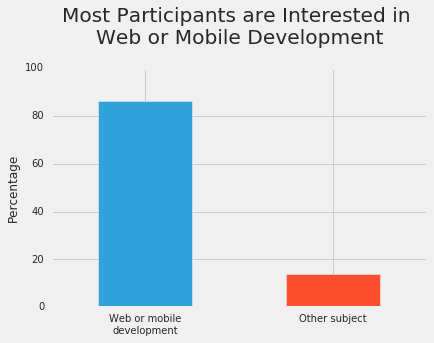

In [6]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

## New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities, for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

We can start by examining the frequency distribution table of the CountryLive variable, which describes what country each participant lives in (not their origin country). We'll only consider those participants who answered what role(s) they're interested in, to make sure we work with a representative sample.

In [7]:
ffc_survey_up["CountryLive"].value_counts(dropna = False)[:10]

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
NaN                          154
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Name: CountryLive, dtype: int64

In [8]:
ffc_survey_up["CountryLive"].value_counts(dropna = False, normalize = True)[:10] * 100

United States of America    44.693936
India                        7.551487
United Kingdom               4.505149
Canada                       3.718535
NaN                          2.202517
Poland                       1.873570
Brazil                       1.844966
Germany                      1.787757
Australia                    1.601831
Russia                       1.458810
Name: CountryLive, dtype: float64

Around 45% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.5%, which is not too far from the United Kingdom (4.5%) or Canada (3.7%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.
Let's start with creating a new column that describes the amount of money a student has spent per month so far. To do that, we'll need to divide the MoneyForLearning column to the MonthsProgramming column. The problem is that some students answered that they have been learning to code for 0 months (it might be that they have just started). To avoid dividing by 0, we'll replace 0 with 1 in the MonthsProgramming column.

In [9]:
# isolate the 4 most represented countries
countries = ["United States of America", "India", "United Kingdom", "Canada"]
ffc_survey_up = ffc_survey_up[ffc_survey_up["CountryLive"].isin(countries)]

# frequency distribution of Money spent on learning
ffc_survey_up["MoneyForLearning"].value_counts(dropna = False)

 0.0         1898
 100.0        253
NaN           221
 200.0        210
 500.0        150
 50.0         141
 1000.0       111
 300.0         91
 20.0          78
 400.0         65
 150.0         60
 2000.0        55
 30.0          53
 5000.0        50
 60.0          40
 40.0          37
 1500.0        33
 250.0         31
 600.0         30
 10.0          30
 15.0          30
 3000.0        26
 10000.0       25
 4000.0        21
 25.0          21
 8000.0        18
 20000.0       17
 800.0         16
 15000.0       16
 2500.0        16
 1200.0        16
 700.0         15
 80.0          13
 5.0           12
 70.0          12
 7000.0        11
 120.0         11
 11000.0       10
 12000.0       10
 35.0          10
 9000.0        10
 350.0         10
 14000.0        9
 6000.0         8
 90.0           8
 16000.0        8
 900.0          8
 450.0          7
 45.0           6
 1400.0         6
 13000.0        6
 18000.0        5
 3500.0         5
 25000.0        4
 125.0          4
 8500.0   

In [10]:
ffc_survey_up["MonthsProgramming"].value_counts(dropna = False)

 1.0      480
 2.0      401
 6.0      397
 12.0     386
 3.0      380
 24.0     267
 4.0      209
NaN       179
 36.0     162
 5.0      156
 0.0      150
 8.0      132
 18.0      92
 10.0      83
 7.0       72
 48.0      71
 9.0       70
 20.0      53
 14.0      49
 60.0      47
 15.0      45
 30.0      44
 16.0      36
 11.0      25
 13.0      22
 40.0      22
 72.0      19
 17.0      16
 50.0      15
 28.0       9
 120.0      8
 42.0       8
 26.0       8
 32.0       7
 25.0       7
 19.0       5
 45.0       5
 21.0       5
 200.0      4
 144.0      4
 52.0       4
 29.0       4
 100.0      4
 27.0       4
 84.0       4
 96.0       3
 55.0       3
 44.0       3
 54.0       3
 35.0       3
 744.0      3
 360.0      3
 22.0       2
 59.0       2
 240.0      2
 480.0      2
 38.0       2
 70.0       2
 33.0       2
 108.0      2
 190.0      1
 80.0       1
 113.0      1
 180.0      1
 43.0       1
 198.0      1
 111.0      1
 58.0       1
 23.0       1
 31.0       1
 34.0       1
 156.0

In [11]:
# Replace 0s with 1s to avoid division by 0
ffc_survey_up['MonthsProgramming'].replace(0,1, inplace = True)

In [12]:
# drop NaN values
ffc_survey_up = ffc_survey_up.dropna(subset = ["MonthsProgramming", "MoneyForLearning"])

In [13]:
# Create new column, money spent each month
ffc_survey_up["Money_per_month"] = ffc_survey_up["MoneyForLearning"] / ffc_survey_up["MonthsProgramming"]

In [14]:
ffc_survey_up["Money_per_month"].value_counts(dropna = False)

0.000000        1844
16.666667         82
50.000000         76
25.000000         74
100.000000        68
8.333333          67
33.333333         64
20.000000         59
12.500000         51
10.000000         48
83.333333         47
166.666667        47
4.166667          38
66.666667         38
5.000000          37
500.000000        32
200.000000        31
250.000000        29
41.666667         28
20.833333         27
2.500000          26
11.111111         26
125.000000        25
3.333333          22
1000.000000       21
5.555556          20
30.000000         19
333.333333        18
75.000000         17
6.666667          16
300.000000        16
1.666667          16
60.000000         16
62.500000         15
416.666667        15
40.000000         15
6.250000          14
666.666667        14
13.888889         14
0.833333          13
15.000000         13
150.000000        13
2000.000000       13
400.000000        13
0.416667          13
833.333333        13
2.083333          13
2.777778     

In [15]:
# drop NaN values
ffc_survey_up2 = ffc_survey_up.dropna(subset = ["CountryLive", "Money_per_month"]).copy()

In [16]:
ffc_survey_up2["CountryLive"].value_counts(dropna = False)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [17]:
# group data by 4 countries
ffc_country_group = ffc_survey_up2.groupby("CountryLive")

We want to group the data by country, and then measure the average amount of money that students spend per month in each country.

In [18]:
# Describe grouped data
ffc_country_group["Money_per_month"].describe().sort_values(by = "mean", ascending = False)

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0


The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

Let's use box plots to visualize the distribution of the money_per_month variable for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



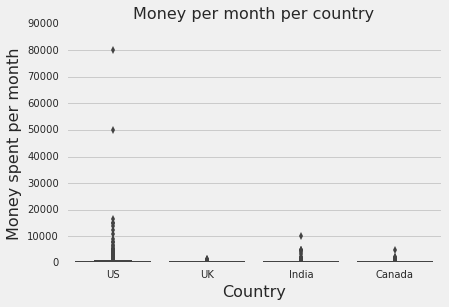

In [19]:
# plot 4 box plots using seaborn
sns.boxplot(x = "CountryLive", y = "Money_per_month",
           data = ffc_survey_up2)

plt.title("Money per month per country", fontsize = 16)
plt.ylim(0, 90000)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Money spent per month", fontsize = 16)
plt.xticks(range(4), ["US", "UK", "India", "Canada"])

plt.show()

As we can see there are some extreme outliers in the US that should be removed. Also after a careful consideration I decited to remove all values greater than 1000 USD/month. Even though some might be this high because of bootcamps, or other expensive education. People who spent more than 1000 USD/month are not looking for cheaper solutions which might take longer to finish.

In [20]:
# filter bellow 1000 USD/month
ffc_survey_up3 = ffc_survey_up2[ffc_survey_up2["Money_per_month"] < 1000]


In [21]:
# group by 4 countries
ffc_country_group_up = ffc_survey_up3.groupby("CountryLive")

In [22]:
# describe grouped data
ffc_country_group_up["Money_per_month"].describe().sort_values(by = "mean", ascending = False)

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
United States of America,2802.0,55.362155,138.256320,0.0,0.0,2.0,33.333333,972.222222
Canada,232.0,46.934471,139.956968,0.0,0.0,0.0,20.000000,900.000000
India,444.0,30.709658,92.851031,0.0,0.0,0.0,10.000000,875.000000
United Kingdom,275.0,28.560399,79.128574,0.0,0.0,0.0,20.000000,936.750000


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



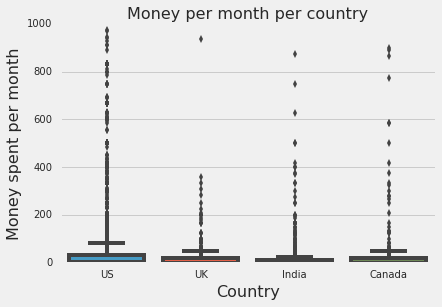

In [23]:
# plot 4 box plots using seaborn
sns.boxplot(x = "CountryLive", y = "Money_per_month",
           data = ffc_survey_up3)

plt.title("Money per month per country", fontsize = 16)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Money spent per month", fontsize = 16)
plt.xticks(range(4), ["US", "UK", "India", "Canada"])

plt.show()

## Conclusion
In this project, I analyzed survey data from new coders to find the best two markets to advertise in. 

The best market to advertise in would be US since there is a magority of new coders and they are willing to spend the most money. However 75% of them are spending maximum of 33 USD/ month and since our subscribtion costs 59 USD/month, our prices might be way to high for majority of new programmers. On the other hand freecodecamp is on of the most popular websites for begginers and after few months of learning for free, people might be willing to spend more money for better educational material.

The second best market to advertise in might be either Canada or India. In canada it seems people are willing to spend more money then in India, but overall there are more people in India learning to code.